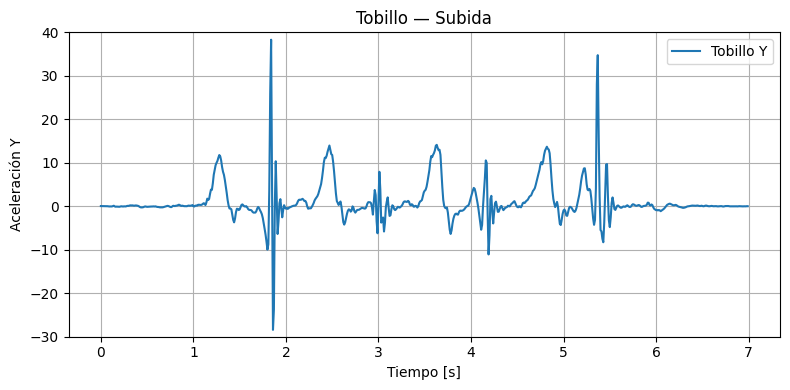

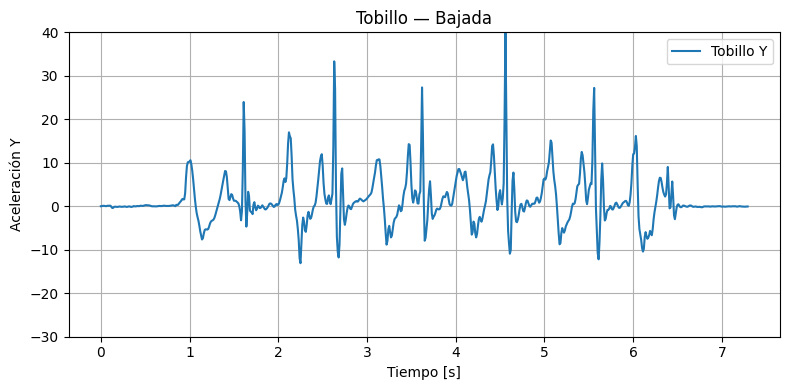

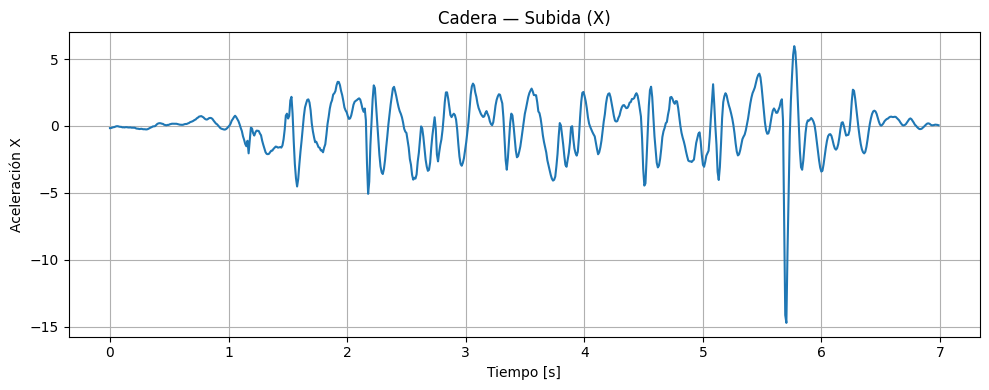

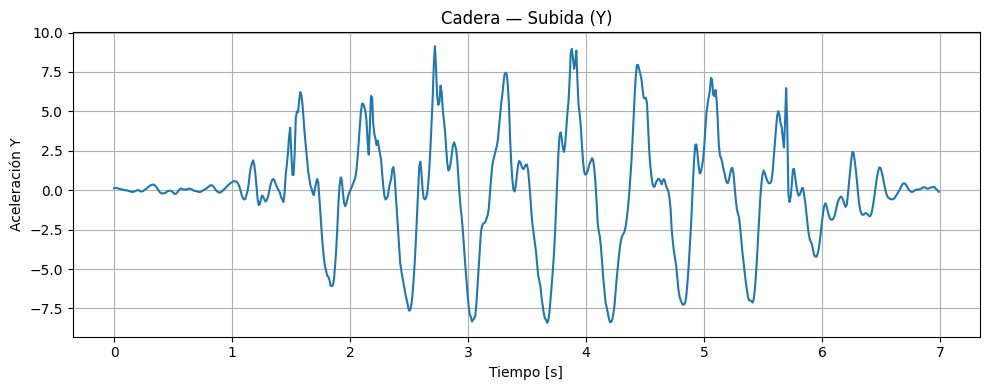

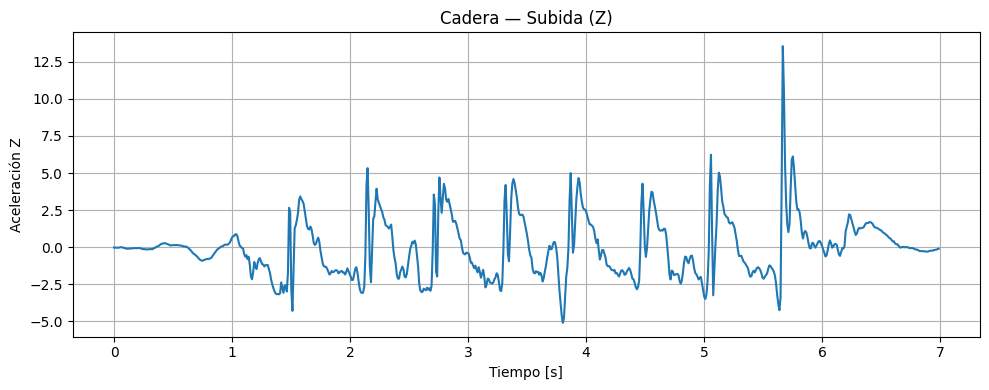

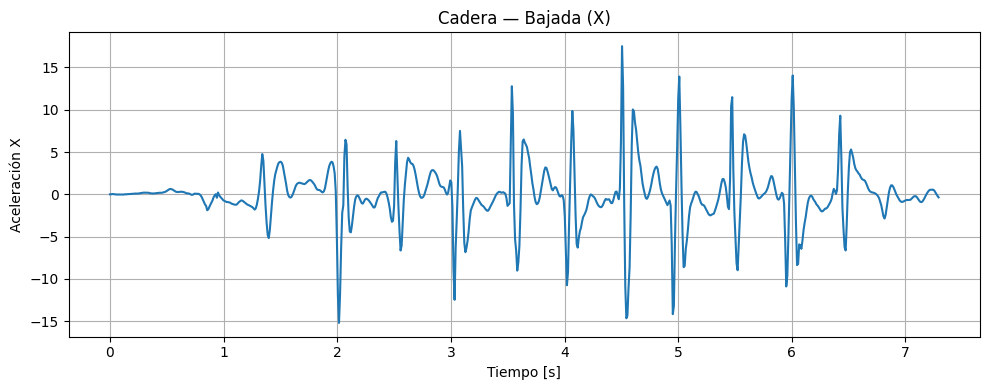

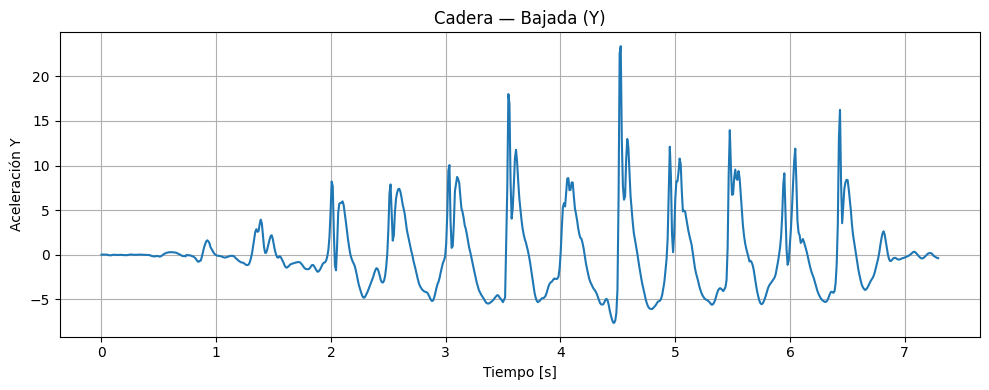

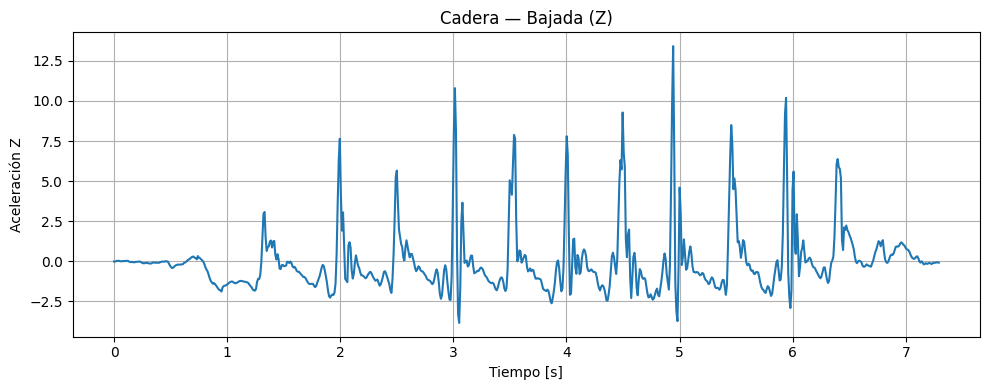

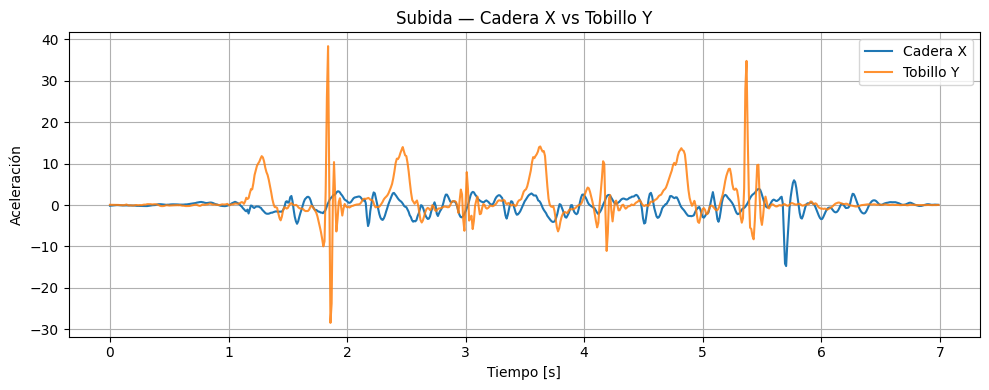

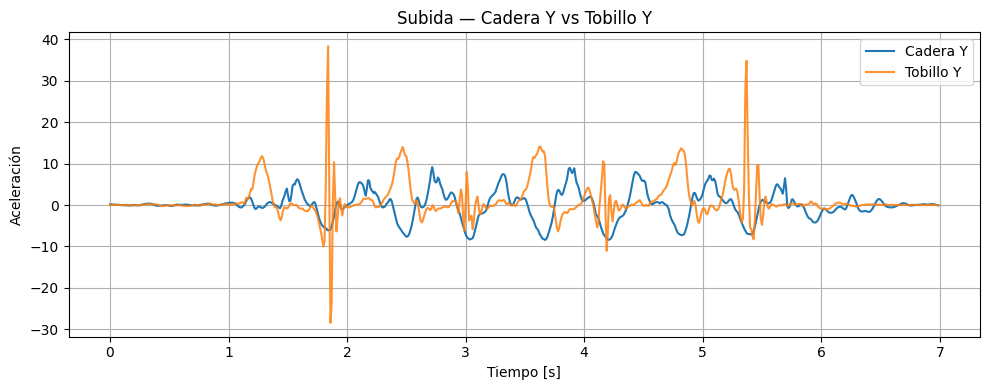

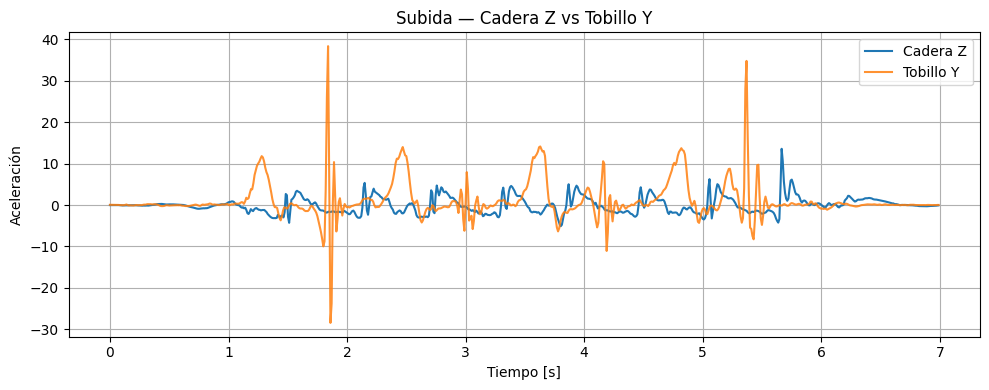

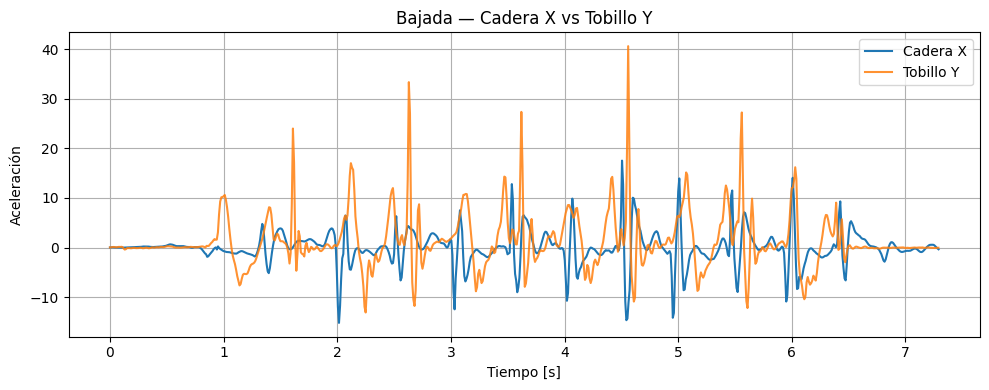

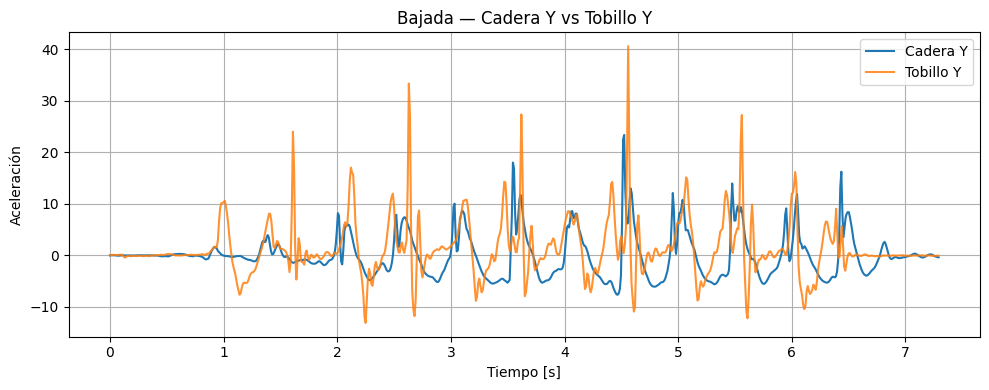

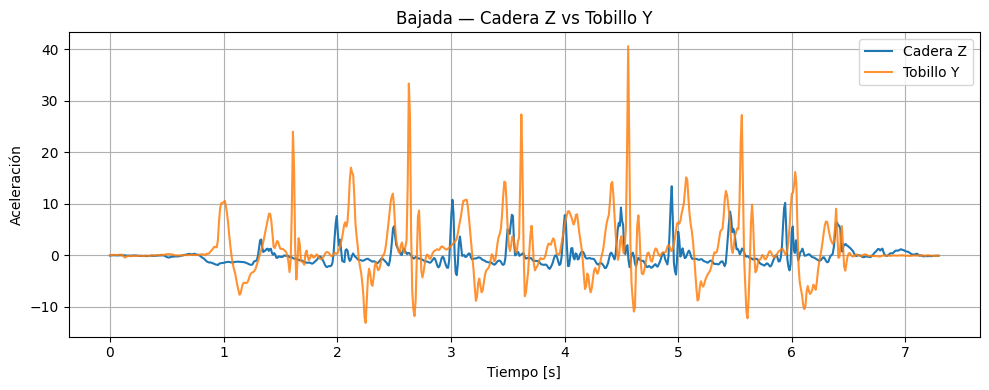

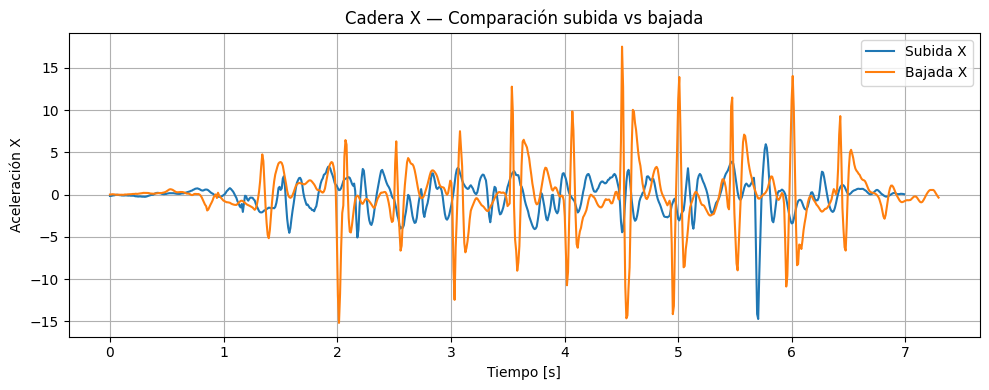

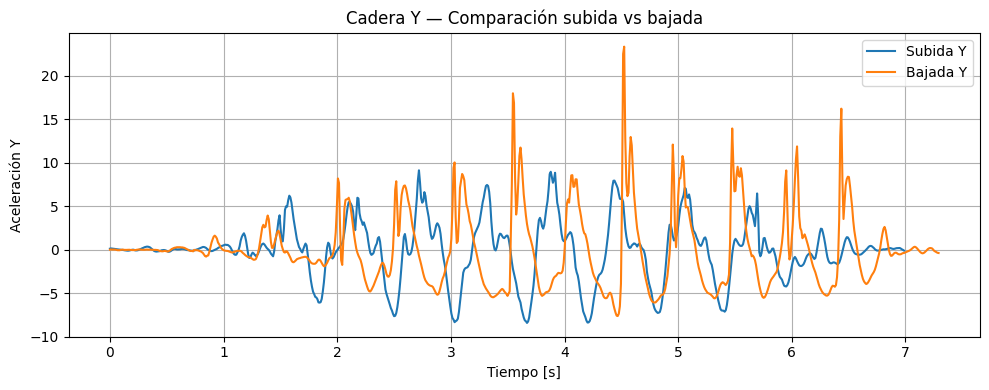

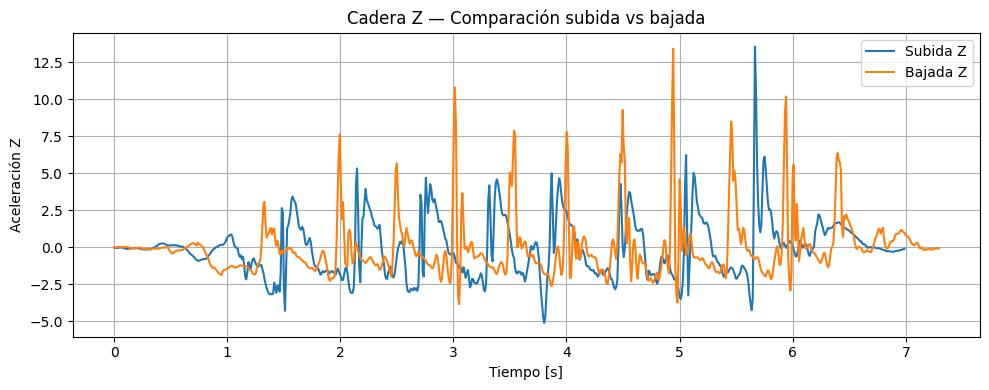

In [1]:
import nbformat as nbf

nb = nbf.v4.new_notebook()

# Markdown de introducción
nb.cells.append(nbf.v4.new_markdown_cell(
"# Análisis de marcha: subida y bajada\n"
"- **Cadera**: X, Y, Z en gráficas separadas\n"
"- **Superposición**: Tobillo Y con cada eje de cadera\n"
"- **Intervalos y t=0**:\n"
"  - Cadera-Subida: 7.5–14.5 s\n"
"  - Cadera-Bajada: 10–17.5 s\n"
"  - Tobillo-Subida: 15–22 s\n"
"  - Tobillo-Bajada: 18–26 s\n"
"- **Comparación**: Cadera subida vs bajada por eje"
))

import pandas as pd
import matplotlib.pyplot as plt

# Leer archivos
cadera_subida  = pd.read_csv('AccelerometerSubidaCadera.csv')
cadera_bajada  = pd.read_csv('AccelerometerBajadaCadera.csv')
tobillo_subida = pd.read_csv('AccelerometerSubidaTobillo.csv')
tobillo_bajada = pd.read_csv('AccelerometerBajadaTobillo.csv')

# Función de recorte y reinicio de tiempo
def recorta(df, t0, t1):
    rec = df[(df['seconds_elapsed'] >= t0) & (df['seconds_elapsed'] <= t1)].copy()
    rec['seconds_elapsed'] = rec['seconds_elapsed'] - rec['seconds_elapsed'].iloc[0]
    return rec

# Recortes
cs = recorta(cadera_subida, 7.1, 14.1)
cb = recorta(cadera_bajada, 10.0, 17.3)
ts = recorta(tobillo_subida, 15.0, 22.0)
tb = recorta(tobillo_bajada, 18.7, 26.0)

#Tobillo eje y para ambas subida y bajada, con limites verticales de 40 a -30

for df, label in [(ts, 'Subida'), (tb, 'Bajada')]:
    plt.figure(figsize=(8,4))
    plt.plot(df['seconds_elapsed'], df['y'], label=f'Tobillo Y')
    plt.title(f'Tobillo — {label}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Aceleración Y')
    plt.ylim(-30, 40)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

# Cadera subida: 3 gráficas
for comp, label in [('x','X'),('y','Y'),('z','Z')]:
    plt.figure(figsize=(10,4))
    plt.plot(cs['seconds_elapsed'], cs[comp])
    plt.title(f'Cadera — Subida ({label})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel(f'Aceleración {label}')
    plt.grid(True)
    plt.tight_layout()

# Cadera bajada: 3 gráficas
for comp, label in [('x','X'),('y','Y'),('z','Z')]:
    plt.figure(figsize=(10,4))
    plt.plot(cb['seconds_elapsed'], cb[comp])
    plt.title(f'Cadera — Bajada ({label})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel(f'Aceleración {label}')
    plt.grid(True)
    plt.tight_layout()

# Superposición subida: cadera (X,Y,Z) vs tobillo Y
for comp, label in [('x','X'),('y','Y'),('z','Z')]:
    plt.figure(figsize=(10,4))
    plt.plot(cs['seconds_elapsed'], cs[comp], label=f'Cadera {label}')
    plt.plot(ts['seconds_elapsed'], ts['y'], label='Tobillo Y', alpha=0.85)
    plt.title(f'Subida — Cadera {label} vs Tobillo Y')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Aceleración')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

# Superposición bajada: cadera (X,Y,Z) vs tobillo Y
for comp, label in [('x','X'),('y','Y'),('z','Z')]:
    plt.figure(figsize=(10,4))
    plt.plot(cb['seconds_elapsed'], cb[comp], label=f'Cadera {label}')
    plt.plot(tb['seconds_elapsed'], tb['y'], label='Tobillo Y', alpha=0.85)
    plt.title(f'Bajada — Cadera {label} vs Tobillo Y')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Aceleración')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

# Comparación subida vs bajada por eje
for comp, label in [('x','X'),('y','Y'),('z','Z')]:
    plt.figure(figsize=(10,4))
    plt.plot(cs['seconds_elapsed'], cs[comp], label=f'Subida {label}')
    plt.plot(cb['seconds_elapsed'], cb[comp], label=f'Bajada {label}')
    plt.title(f'Cadera {label} — Comparación subida vs bajada')
    plt.xlabel('Tiempo [s]')
    plt.ylabel(f'Aceleración {label}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

plt.show()
